In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Atidot data/WashU_data.csv')

In [3]:
for n in df.columns:  
    df[n] = df[n].astype(str).str.replace('+','', regex=True)
    df[n] = df[n].astype(str).str.replace('-','', regex=True)

In [111]:
df_1 = df.iloc[:,3:]
df_1.columns = df.columns[3:]
for n in df_1.columns:  
    df_1[n] = pd.to_numeric(df_1[n], errors='coerce')

C:\Users\15321\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [112]:
df_1.dropna(thresh=df_1.shape[1]* 0.80,inplace=True)
df_1.dropna(thresh=df_1.shape[0]* 0.80,axis=1,inplace=True)

C:\Users\15321\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\15321\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
col = df_1.columns.to_list()

In [116]:
from sklearn.impute import SimpleImputer

# Fill NA values with 0
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
df_1 = imputer.fit_transform(df_1)
df_1 = pd.DataFrame(df_1)
df_1.columns = col

In [117]:
df_1.drop(df_1[[c for c in df_1.columns if 'Percent' in c]].loc[:,(df_1>100).any()].columns, axis=1, inplace=True)

In [118]:
df_1

,DP03_0002PE_Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,DP03_0003PE_Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,DP03_0004PE_Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,DP03_0005PE_Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,DP03_0006PE_Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,DP03_0007PE_Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,DP03_0009PE_Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,DP03_0011PE_Percent!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,DP03_0012PE_Percent!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force,DP03_0013PE_Percent!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force!!Employed,...,DP03_0128PE_Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people,DP03_0129PE_Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years,DP03_0130PE_Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years!!Related children of the householder under 18 years,DP03_0131PE_Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years!!Related children of the householder under 18 years!!Related children of the householder under 5 years,DP03_0132PE_Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Under 18 years!!Related children of the householder under 18 years!!Related children of the householder 5 to 17 years,DP03_0133PE_Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over,DP03_0134PE_Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!18 to 64 years,DP03_0135PE_Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,DP03_0136PE_Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,DP03_0137PE_Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over
0,40.2,40.2,26.1,14.1,0.0,59.8,35.0,34.0,34.0,22.9,...,61.9,73.4,73.4,74.4,73.0,58.8,58.9,58.5,61.0,67.6
1,39.7,39.7,35.3,4.5,0.0,60.3,11.3,32.6,32.6,28.8,...,49.5,56.7,56.7,65.2,54.4,47.9,49.3,43.2,47.1,65.7
2,39.1,38.8,30.7,8.2,0.3,60.9,21.0,34.7,34.6,27.1,...,51.6,63.0,62.0,74.1,58.4,48.7,50.3,44.4,48.7,64.7
3,26.0,26.0,22.9,3.1,0.0,74.0,12.0,17.9,17.9,14.8,...,65.5,80.2,80.1,84.4,78.9,62.1,68.1,43.6,64.4,72.1
4,41.3,41.3,36.7,4.6,0.0,58.7,11.1,34.3,34.3,30.1,...,46.0,55.3,55.3,64.2,53.2,43.9,43.9,43.8,44.0,59.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31668,69.1,69.1,64.9,4.2,0.0,30.9,6.1,67.0,67.0,63.9,...,19.4,25.1,24.7,34.2,20.8,17.9,20.7,6.1,17.6,24.2
31669,49.4,49.4,43.5,5.9,0.0,50.6,12.0,44.8,44.8,38.8,...,36.5,58.6,58.6,59.3,58.3,27.6,34.0,5.5,38.2,28.8
31670,67.4,67.4,56.4,11.0,0.0,32.6,16.3,68.6,68.6,60.6,...,17.4,30.2,29.9,53.0,18.5,13.8,14.6,10.2,16.7,19.6
31671,55.7,55.7,45.8,9.9,0.0,44.3,17.7,56.4,56.4,50.3,...,15.1,21.2,21.2,19.3,21.7,12.8,13.3,10.3,13.7,26.4


In [119]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
import pandas as pd

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X) # calculation Cov matrix is embeded in PCA
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]
        
# Usage
pfa = PFA(n_features=15)
pfa.fit(df_1)
# To get the transformed matrix
x = pfa.features_
print(x)
# To get the column indices of the kept features
column_indices = pfa.indices_

[[-0.42128094 -1.67200911 -0.6106922  ...  2.60728702 -0.17239019
   3.13971748]
 [-0.15780615 -1.71585483  1.4769903  ...  2.30050326 -0.06521258
   3.63926011]
 [-0.7467498  -1.79477711 -0.71658914 ...  2.09598075  0.26606366
   2.42037608]
 ...
 [-0.57626611  0.71319766  1.06853068 ...  0.22606065 -2.02363977
   0.05254401]
 [-0.26629577 -0.31279202  2.38467834 ...  0.37214816 -1.34160045
   0.18242509]
 [ 0.86509598 -0.34786859 -0.30812952 ...  0.25527815 -1.30262678
  -0.16725475]]


In [120]:
df_2 = df_1.iloc[:,column_indices]

In [121]:
df_2.columns

Index(['DP03_0024PE_Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Worked from home',
       'DP03_0003PE_Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force',
       'DP03_0020PE_Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled',
       'DP03_0036PE_Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Wholesale trade',
       'DP03_0022PE_Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Walked',
       'DP03_0023PE_Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Other means',
       'DP03_0077PE_Percent!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Families!!$10,000 to $14,999',
       'DP03_0055PE_Percent!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!$25,000 to $34,999',
       'DP03_0056PE_Percent!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!$35,000 to $49,999',
       'DP03_0060PE_Percent!!INC

In [122]:
sc = StandardScaler()
scaled_df = sc.fit_transform(df_2)
scaled_df = pd.DataFrame(scaled_df)

In [81]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# Hopkins Statistic
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [123]:
hopkins(scaled_df)

0.9527454522907564

## KMeans Selection (Too much time to get results)

In [ ]:
maxvars = 15
kmin=2
kmax=8

kmeans_kwargs = {'init': 'random', 'n_init': 10, 'max_iter': 300, 'random_state': 0}
cols = list(scaled_df.columns)

results_for_each_k = []
vars_for_each_k = {}

In [ ]:
from sklearn.cluster import KMeans


for k in range(kmin, kmax+1):
    selected_variables = []
    while(len(selected_variables)<maxvars):
        results = []
        for col in cols:
            scols = []
            scols.extend(selected_variables)
            scols.append(col)
            kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(scaled_df[scols])
            results.append(silhouette_score(scaled_df[scols], kmeans.predict(df[scols])))
        selected_var=cols[np.argmax(results)]
        selected_variables.append(selected_var)
        cols.remove(selected_var)
    results_for_each_k.append(max(results))
    vars_for_each_k[k]=selected_variables

In [ ]:
best_k=np.argmax(results_for_each_k)+kmin
print(best_k)

In [ ]:
selected_variables=vars_for_each_k[best_k]
kmeans = KMeans(n_clusters=best_k, **kmeans_kwargs)
kmeans.fit(scaled_df[selected_variables])
clusters=kmeans.predict(scaled_df[selected_variables])

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(15,15))
#plt.rcParams['font.size'] = 22
ax = plt.axes(projection="3d")
z_points = scaled_df[selected_variables[0]]
x_points = scaled_df[selected_variables[1]]
y_points = scaled_df[selected_variables[2]]
f1=ax.scatter3D(x_points, y_points, z_points, c=clusters,cmap='Accent',s=300);

ax.set_xlabel(selected_variables[0],fontsize = 20)
ax.set_ylabel(selected_variables[1],fontsize = 20)
ax.set_zlabel(selected_variables[2],fontsize = 20)
ax.legend(clusters)

plt.title('KMeans used on the Europe Datasets',fontsize = 24)
plt.show()

## Imported File

In [ ]:
from fs_ono2020 import FeatureSelector

In [ ]:
# Feature selection from Github. (Get results in a short time)
selector = FeatureSelector(n_features=15, random_state=0, logging=True)
df_selected = selector.fit_transform(scaled_df.to_numpy())

print(selector.selected)

In [ ]:
scaled_df.columns[selector.selected]

In [ ]:
df_selected = pd.DataFrame(df_selected)
df_selected.columns = scaled_df.columns[selector.selected]

In [ ]:
df_selected

In [ ]:
# A 0.92 hopkins statistics means the data is highly clustered.
hopkins(df_selected)

In [ ]:
# pip install yellowbrick

In [ ]:
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow_m = KElbowVisualizer(KMeans(), k=10)
elbow_m.fit(df_selected)
elbow_m.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
yhat_km = km.fit_predict(df_selected)

ac = AgglomerativeClustering(n_clusters=5)
yhat_ac = ac.fit_predict(df_selected)

df_selected['KMeans'] = yhat_km
df_selected["Agglomerative"]= yhat_ac
df_selected['GEO_ID_id'] = df['GEO_ID_id']

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

# Silhouette score is close to 0, which means clusters are overlapping
km_eval = KMeans(n_clusters = 5, init = 'k-means++', 
                      max_iter = 200, n_init = 10, random_state=0).fit(df_selected)
km_label = km_eval.labels_
metrics.silhouette_score(df_selected, km_label, metric='euclidean')

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", "#9F8A78"]
pl = sns.countplot(x=df_selected["KMeans"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
pl = sns.countplot(x=df_selected["Agglomerative"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78"])

x = df_selected.iloc[:,0]
y = df_selected.iloc[:,1]
z = df_selected.iloc[:,2]

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_selected["KMeans"], marker='o', cmap='Spectral')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_selected["Agglomerative"], marker='o', cmap='Spectral')
ax.set_title("The Plot Of The Clusters")
plt.show()

## Clustering

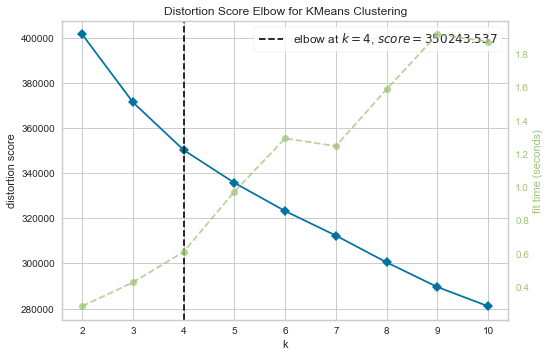

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [124]:
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow_m = KElbowVisualizer(KMeans(), k=10)
elbow_m.fit(scaled_df)
elbow_m.show()

In [182]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
yhat_km = km.fit_predict(scaled_df)

df_2['KMeans'] = yhat_km
df_2['ZIP'] = df['GEO_ID_id'].str[-5:]

C:\Users\15321\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\15321\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [185]:
df_2.columns

Index(['DP03_0024PE_Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Worked from home',
       'DP03_0003PE_Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force',
       'DP03_0020PE_Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Car, truck, or van -- carpooled',
       'DP03_0036PE_Percent!!INDUSTRY!!Civilian employed population 16 years and over!!Wholesale trade',
       'DP03_0022PE_Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Walked',
       'DP03_0023PE_Percent!!COMMUTING TO WORK!!Workers 16 years and over!!Other means',
       'DP03_0077PE_Percent!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Families!!$10,000 to $14,999',
       'DP03_0055PE_Percent!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!$25,000 to $34,999',
       'DP03_0056PE_Percent!!INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Total households!!$35,000 to $49,999',
       'DP03_0060PE_Percent!!INC

In [189]:
df_2.to_csv("Clustered.csv",index = False)

## Marketing Names

In [ ]:
# Cluster 0: Upper Class
# Cluster 1: Lower Class
# Cluster 2: City Middle Class
# Cluster 3: Walk-to-work Middle Class
# Cluster 4: Suburban Middle Class

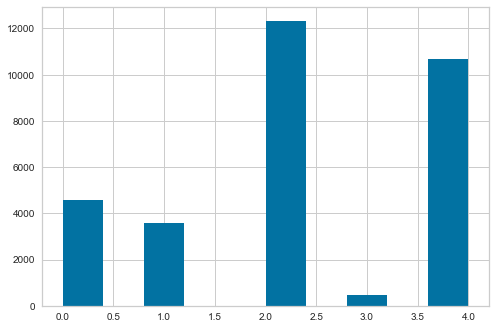

In [193]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

km_eval = KMeans(n_clusters = 100, init = 'k-means++', 
                      max_iter = 300, n_init = 10, random_state=0).fit(scaled_df)
km_label = km_eval.labels_
metrics.silhouette_score(scaled_df, km_label, metric='euclidean')

plt.hist(km_label)
plt.show()

## K Means

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", "#9F8A78"]
pl = sns.countplot(x=df_1["KMeans"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78"])

x = df_2.iloc[:,6]
y = df_2.iloc[:,8]
z = df_2.iloc[:,10]

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_1["KMeans"], marker='o', cmap='Spectral')
ax.set_title("The Plot Of The Clusters")
plt.show()

## Agglomerative

In [ ]:
pl = sns.countplot(x=df_1["Agglomerative"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_1["Agglomerative"], marker='o', cmap='Spectral')
ax.set_title("The Plot Of The Clusters")
plt.show()